In [1]:
import sys, os
import pandas as pd


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
%cd ../../

/mnt/ceph1-npx/user/nlad/NNMFitStuff


/home/nlad/NNMFit_venv_test/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
#plot_data_mc?

In [4]:
###for LvsE
#fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/HESE12/SPL/SAY/LvsE_prior3Syst/Freefit_04.pickle'

####for 3D
fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/LvsE_largebins/kdefits/with_mgunprior/with_double_gradients/prioronholeice/Freefit_05.pickle'
#fit_file = '/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/ParamScans/LvsE_largebins/allparams/FitRes_astro_nutau_ratio_p0_0000.pickle'

In [5]:
#parm input file to check data/mc at a specific group of paramter values
#in this case, a specific scan point on flavor triangle (very close to 1:1:1)
#saved from one of the scan point fits of the 3D fit file

param_input_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/FitResults/Data/HESE12/SPL/SAY/ParamScans/LvsE_largebins/allparams/FitRes_astro_nutau_ratio_p0_0000.pickle'
)

In [9]:
#param_input_dict = param_input_file.to_dict()

In [6]:
astro_graph_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/NNMFit_Configs/Graphs/AstroOnlyGradientsGraph.pickle'
)
conv_graph_file = pd.read_pickle(
'/data/ana/Diffuse/GlobalFit_Flavor/NNMFit_Configs/Graphs/ConvOnlyGradientsGraph.pickle'
)

# astro_graphdict = astro_graph_file.to_dict()
# conv_graphdict = conv_graph_file.to_dict()

In [7]:
component_graphdict = {'astro_allflavor':astro_graph_file,'conv':conv_graph_file,
                      'prompt':None,'muon':None}

In [8]:
params_all_zero = {
    # atmospheric flux parameters
    'conv_norm': 0.0,
    'prompt_norm': 0.0,
    'delta_gamma': 0.0,
    'CR_grad': 0.0,
    'barr_h': 0.0,
    'barr_w': 0.0,
    'barr_z': 0.0,
    'barr_y': 0.0,

    
    # astro flux: default (generic) SPL
    'astro_norm': 0.0,
    'gamma_astro': 2.8429418575098397,
    'astro_nue_ratio': 1.0,
    'astro_nutau_ratio': 1.0,
    'inel_scale':0.0,
    'muongun_norm':0.0,
    
# # #     #snow storm parameters
    'dom_eff': 1.043904437153759,
 'ice_abs': 0.9885817135163371,
 'ice_aniso': 0.9076585570846607,
 'ice_holep0': -0.26734101032284746,
 'ice_holep1': -0.08416403190869036,
 'ice_scat': 0.9794450117263607,

    
}

In [13]:
# param_input_dict = param_input_file['fit-result'][1]

In [9]:
plot_dir = "/data/user/tvaneede/GlobalFit/analysis/icrc_checks"

In [15]:
plot_data_mc?

In [12]:
sys.path.append( "/data/user/tvaneede/GlobalFit/analysis/icrc_checks" )


generating histogram for astro_allflavor component with following values
{'conv_norm': 0.0, 'prompt_norm': 0.0, 'delta_gamma': 0.0, 'CR_grad': 0.0, 'barr_h': 0.0, 'barr_w': 0.0, 'barr_z': 0.0, 'barr_y': 0.0, 'astro_norm': 2.5277852222696753, 'gamma_astro': 2.8429418575098397, 'astro_nue_ratio': 0.45232987213122944, 'astro_nutau_ratio': 0.8963998364159318, 'inel_scale': 0.999950692509751, 'muongun_norm': 0.0, 'dom_eff': 1.0, 'ice_abs': 1.0, 'ice_scat': 1.0, 'ice_aniso': 1.0, 'ice_holep0': -0.27, 'ice_holep1': -0.042}
generating histogram for conv component with following values
{'conv_norm': 0.9955774852653808, 'prompt_norm': 0.0, 'delta_gamma': -0.00012043215168910682, 'CR_grad': 0.04816420768006666, 'barr_h': -3.603662184955879e-05, 'barr_w': -0.001794286951860185, 'barr_z': -0.004247966017242478, 'barr_y': -0.01004913618573267, 'astro_norm': 0.0, 'gamma_astro': 2.87, 'astro_nue_ratio': 1.0, 'astro_nutau_ratio': 1.0, 'inel_scale': 0.999950692509751, 'muongun_norm': 0.0, 'dom_eff': 1.0

/data/user/tvaneede/GlobalFit/analysis/icrc_checks/utils/data_mc_plots_from_fit.py:138: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(data_l,data_e,marker='1',s=160,facecolor='k',edgecolor='k',label='Data events')


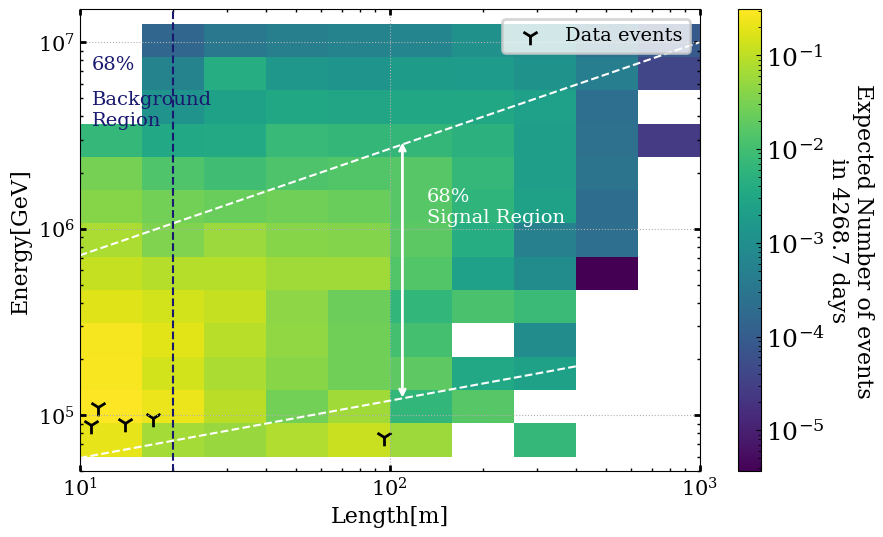

In [18]:
from utils.data_mc_plots_from_fit import plot_data_mc_single_fit as plot_data_mc

plot_data_mc(fit_res_file=fit_file,plot_components=True,\
             perbin_plots=True,params_all_zero=params_all_zero,
             component_graphdict=component_graphdict,plot_dir=plot_dir,plot_name='DataMC')